<a href="https://colab.research.google.com/github/DanieleAngioni97/Introductory-Seminar-PyTorch/blob/main/notebooks/02_ml_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Dataset and features
Let's consider a binary classification problem in which we have to classify flamingos and seagulls as we have seen during the lecture.
For simplicity, let's pretend that seagulls and flamingos features (*lenght of the legs*, *wingspan*) are sampled from gaussian distributions $N(\mu, \sigma)$, where $\mu_{flamingo} = [8, 7]^T$, and $\mu_{seagull} = [5, 3]^T$ and $\sigma_{flamingo} = \sigma_{seagull} = 1.5$.

Now we sample $10$ seagull and $10$ flamingo and we visualize them in a 2-dimensional space.

In [ ]:
n_samples_per_class = 10
n_features = 2
std = 1.5

torch.manual_seed(0)    # needed for reproducibility
mean_flamingos = torch.tensor([8, 7])
mean_seagulls = torch.tensor([5, 3])

# randn is the normal distribution with zero mean and std=1
# from it we first scale the samples based on std and we add the mean of each class
X_flamingos = torch.randn(size=(n_samples_per_class, n_features)) * std + mean_flamingos
X_seagulls = torch.randn(size=(n_samples_per_class, n_features)) * std + mean_seagulls

# we encode flamingos as the label y=0, while seagulls with label y=1
X = torch.cat([X_flamingos, X_seagulls])
y = torch.cat([torch.zeros(size=(n_samples_per_class,)),
               torch.ones(size=(n_samples_per_class,))])

In [ ]:
print(X)
print(X.shape)

tensor([[ 6.3112,  5.2715],
        [ 7.6241,  6.3492],
        [ 8.8983,  4.6674],
        [ 7.4880,  9.7795],
        [ 8.7021,  6.7634],
        [10.1655,  7.3991],
        [10.0840,  9.3795],
        [ 9.4194,  5.7345],
        [ 9.3977,  8.8885],
        [11.0075,  7.0806],
        [ 5.6595,  3.1686],
        [ 5.9612,  3.6617],
        [ 5.3083,  2.3245],
        [ 4.1404,  2.1670],
        [ 5.8915,  5.3129],
        [ 5.7610,  2.1135],
        [ 3.0120,  3.2828],
        [ 4.8964,  2.2576],
        [ 2.7561,  2.7092],
        [ 5.6683,  4.9879]])
torch.Size([20, 2])


In [ ]:
print(y)
print(y.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
torch.Size([20])


In [ ]:
print('### X_flamingos ###\n', X[y == 0, :])
print(X[y == 0, :].shape)

### X_flamingos ###
 tensor([[ 6.3112,  5.2715],
        [ 7.6241,  6.3492],
        [ 8.8983,  4.6674],
        [ 7.4880,  9.7795],
        [ 8.7021,  6.7634],
        [10.1655,  7.3991],
        [10.0840,  9.3795],
        [ 9.4194,  5.7345],
        [ 9.3977,  8.8885],
        [11.0075,  7.0806]])
torch.Size([10, 2])


In [ ]:
print('### X_seagulls ###\n', X[y == 1, :])
print(X[y == 1, :].shape)

### X_seagulls ###
 tensor([[5.6595, 3.1686],
        [5.9612, 3.6617],
        [5.3083, 2.3245],
        [4.1404, 2.1670],
        [5.8915, 5.3129],
        [5.7610, 2.1135],
        [3.0120, 3.2828],
        [4.8964, 2.2576],
        [2.7561, 2.7092],
        [5.6683, 4.9879]])
torch.Size([10, 2])


Since data can presents very different scales, in ML we usually prefer to normalize it, say in the range $[0, 1]$.

In [ ]:
X = (X - X.min()) / X.max()
print(X)

tensor([[0.3814, 0.2869],
        [0.5006, 0.3848],
        [0.6164, 0.2320],
        [0.4883, 0.6964],
        [0.5986, 0.4224],
        [0.7315, 0.4802],
        [0.7241, 0.6601],
        [0.6637, 0.3290],
        [0.6618, 0.6155],
        [0.8080, 0.4513],
        [0.3222, 0.0959],
        [0.3496, 0.1407],
        [0.2902, 0.0192],
        [0.1841, 0.0049],
        [0.3432, 0.2907],
        [0.3314, 0.0000],
        [0.0816, 0.1062],
        [0.2528, 0.0131],
        [0.0584, 0.0541],
        [0.3229, 0.2611]])


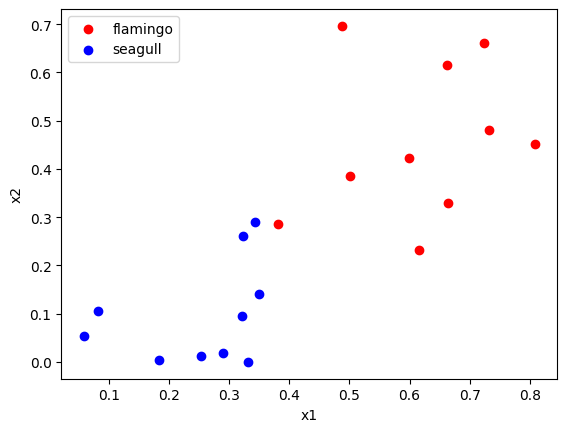

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[y == 0, :][:, 0],
           X[y == 0, :][:, 1],
           label='flamingo',
           color='red')
ax.scatter(X[y == 1, :][:, 0],
           X[y == 1, :][:, 1],
           label='seagull',
           color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
fig.show()

# Linear Classifiers

Now let's consider the linear function
$f(\textbf{x}) = \textbf{w}^T \cdot \textbf{x} + b$, setting $\textbf{w} = [1, 2]^T$ and $b=6$.

To classify we can consider the sign of $f(x)$: if $f(x) > 0$ then $y=1$, else $y=0$.
To assign probabilities to each sample instead, we can apply the sigmoid activation function $\sigma(s) = \cfrac{1}{1 + e^{-s}}$ to the output score $s = f(\textbf{x})$.



In [ ]:
def f(x, w, b):
    # f = (x1 * w1) + (x2 * w2) + b
    return x @ w + b

def sigmoid(s):
    return 1 / (1 + torch.exp(-s))

w = torch.tensor([-1., -2.])
b = torch.tensor(10)
scores = f(X, w, b)
y_pred = (scores > 0).float()
probabilities = sigmoid(scores)
print("### Scores ###\n", scores)
print("### Pred. ###\n", y_pred)
print("### Probabilities ###\n", probabilities)

### Scores ###
 tensor([9.0448, 8.7298, 8.9196, 8.1189, 8.5566, 8.3081, 7.9557, 8.6783, 8.1072,
        8.2895, 9.4861, 9.3691, 9.6714, 9.8061, 9.0754, 9.6686, 9.7059, 9.7210,
        9.8334, 9.1548])
### Pred. ###
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
### Probabilities ###
 tensor([0.9999, 0.9998, 0.9999, 0.9997, 0.9998, 0.9998, 0.9996, 0.9998, 0.9997,
        0.9997, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999])


We can also use the built-in PyTorch implementation of the sigmoid function:

In [ ]:
print(torch.sigmoid(scores))    # built-in PyTorch function

tensor([0.9999, 0.9998, 0.9999, 0.9997, 0.9998, 0.9998, 0.9996, 0.9998, 0.9997,
        0.9997, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999])


# Multi-class Problem
Consider the sample $\textbf{x} =
\begin{bmatrix}
0.5 & 1
\end{bmatrix}^T$.
We have to assign this sample to one of three classes $y \in \{0, 1, 2\}$ using the function $f(\textbf{x}) = \textbf{W} \cdot \textbf{x} + \textbf{b}$, where:

$\textbf{W} =
\begin{bmatrix}
0.2 & 0.5 \\
2.1 & -1.3 \\
-3 & -2.2
\end{bmatrix}$,

$\textbf{b} =
\begin{bmatrix}
0.5 & -0.2 & 4.1
\end{bmatrix}^T$

Let's compute:
* the score vector $\textbf{s} = f(\textbf{x})$
* the predictions
* the discrete probability distribution using the softmax function
$\sigma_k(\textbf{s}) = \cfrac{e^{-s_k}}{\sum_{j=1}^c e^{-s_j}}$


In [ ]:
x = torch.tensor([[0.5, 1]],
                 dtype=torch.float).T   # torch.Size([2, 1])
W = torch.tensor([[0.2, 0.5],
                  [2.1, -1.3],
                  [-3, -2.2]],
                 dtype=torch.float)     # torch.Size([3, 2])
b = torch.tensor([[0.5, -0.2, 4.1]],
                 dtype=torch.float).T   # torch.Size([3, 1])
s = W @ x + b
y_pred = s.argmax(dim=1)
print(s)
print(y_pred)

tensor([[ 1.1000],
        [-0.4500],
        [ 0.4000]])
tensor([0, 0, 0])


In [ ]:
def softmax(s):
    exps = torch.exp(s)
    return  exps/ exps.sum()

probs = softmax(s.T)
print(probs)

tensor([[0.5852, 0.1242, 0.2906]])


In [ ]:
from torch.nn import Softmax
probs = Softmax()(s.T)  # built-in PyTorch function
print(probs)

tensor([[0.5852, 0.1242, 0.2906]])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


# Gradient Descent

Let's consider a simple regression problem:

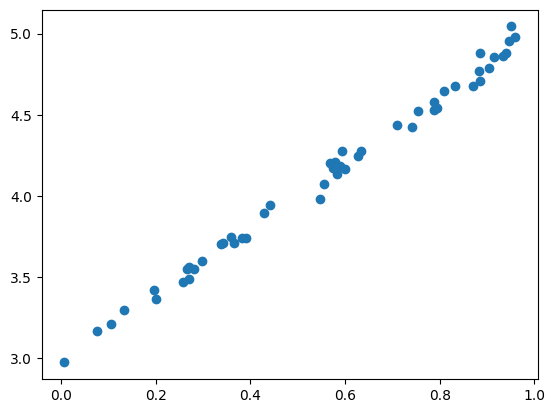

In [ ]:
n_samples = 50
random_state = 42
torch.manual_seed(random_state)
samples = torch.rand(size=(n_samples,))
noise = 0.05 * torch.randn(size=(n_samples,))
labels = 2*samples + 3     # underlying function to be learned
labels += noise
plt.scatter(samples, labels)

Now we can define:
* our model as a linear function
* the loss function as the Mean Squared Error: $L = (\hat{y} - y)^2$
* some utilities function for plotting the points and the linear function on the 2D plane

In [ ]:
def model(x, w, b):
    return w * x + b

def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true)**2
    return squared_diffs.mean()

def plot_line(w, b, **kwargs):
    x_axis = torch.linspace(0, 1, 100)
    y_axis = w * x_axis + b
    plt.plot(x_axis.detach().numpy(),
             y_axis.detach().numpy(),
             color='r', **kwargs)

def plot_points(samples, labels):
    plt.scatter(samples, labels)

def plot_module(model, **kwargs):
    x_axis = torch.linspace(0, 1, 100).unsqueeze(dim=1)
    y_axis = model(x_axis)
    plt.plot(x_axis.detach().numpy(),
             y_axis.detach().numpy(),
             color='r', **kwargs)

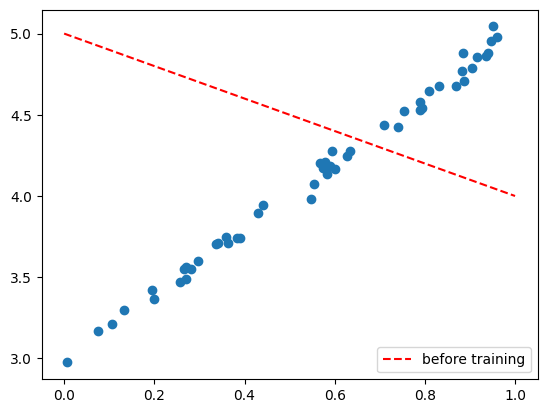

In [ ]:
torch.manual_seed(random_state)
params = torch.tensor([-1., 5.], requires_grad=True)
plot_points(samples, labels)
plot_line(*params, label='before training', linestyle='dashed')
plt.legend()

## Simple Gradient Descent using autograd

Let's try first one iteration at a time.

Loss = 0.002244147937744856


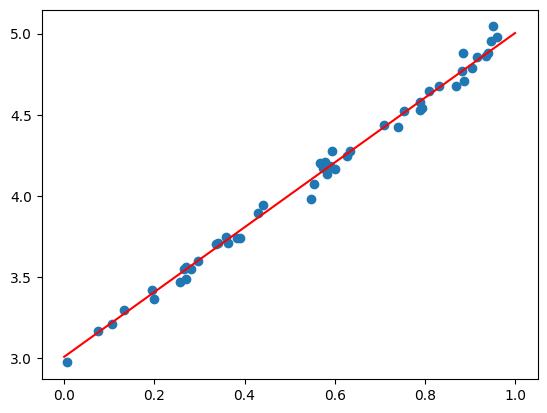

In [ ]:
learning_rate = 1e-1

y_pred = model(samples, *params)
loss = loss_fn(y_pred, labels)
loss.backward()
with torch.no_grad():
    params -= learning_rate * params.grad
    params.grad.zero_()
    print(f"Loss = {loss.item()}")

plot_points(samples, labels)
plot_line(*params)
plt.show()

If we let the gradient descent algorithm to run multiple times we can see that it converge to an optimal solution!

Epoch: 0, Loss 0.783028
Epoch: 100, Loss 0.078971
Epoch: 200, Loss 0.010152
Epoch: 300, Loss 0.003007
Epoch: 400, Loss 0.002265
Epoch: 500, Loss 0.002188
Epoch: 600, Loss 0.002180
Epoch: 700, Loss 0.002179
Epoch: 800, Loss 0.002179
Epoch: 900, Loss 0.002179


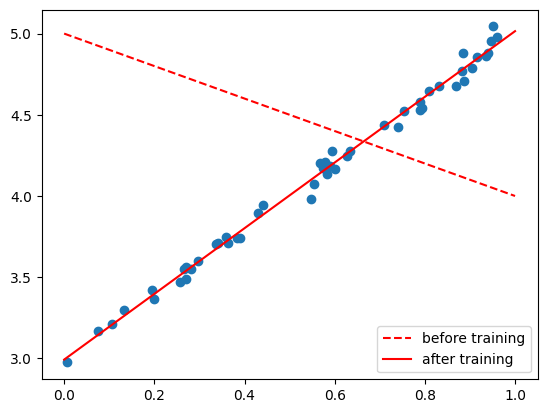

In [ ]:
epochs = 1000
learning_rate = 1e-1

params = torch.tensor([-1., 5.], requires_grad=True)
plot_points(samples, labels)
plot_line(*params, label='before training', linestyle='dashed')

for epoch in range(epochs):
    y_pred = model(samples, *params)
    loss = loss_fn(y_pred, labels)
    loss.backward()
    with torch.no_grad():
        params -= learning_rate * params.grad
    params.grad.zero_()
    if epoch % 100 == 0:
        print("Epoch: %d, Loss %f" % (epoch, float(loss)))

plot_line(*params, label='after training')
plt.legend()
plt.show()

## Using built-in modules

Epoch: 0, Loss 1.673574
Epoch: 100, Loss 0.080875
Epoch: 200, Loss 0.079673
Epoch: 300, Loss 0.079591
Epoch: 400, Loss 0.079586
Epoch: 500, Loss 0.079586
Epoch: 600, Loss 0.079586
Epoch: 700, Loss 0.079586
Epoch: 800, Loss 0.079586
Epoch: 900, Loss 0.079586


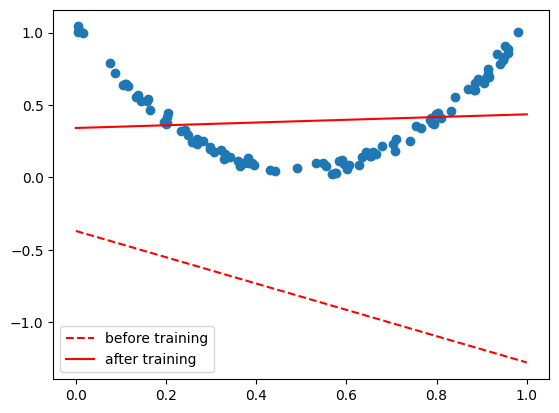

In [ ]:
epochs = 1000
learning_rate = 1e-1

model = torch.nn.Linear(1, 1)
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

plot_points(samples, labels)
plot_module(model, label='before training', linestyle='dashed')
for epoch in range(epochs):
    y_pred = model(samples.float().unsqueeze(1))
    loss = loss_fn(y_pred, labels.float().unsqueeze(1))
    loss.backward()
    optim.step()
    optim.zero_grad()
    if epoch % 100 == 0:
        print("Epoch: %d, Loss %f" % (epoch, float(loss)))
plot_module(model.to('cpu'), label='after training', linestyle='solid')
plt.legend()
plt.show()

## Non linearities in the data...

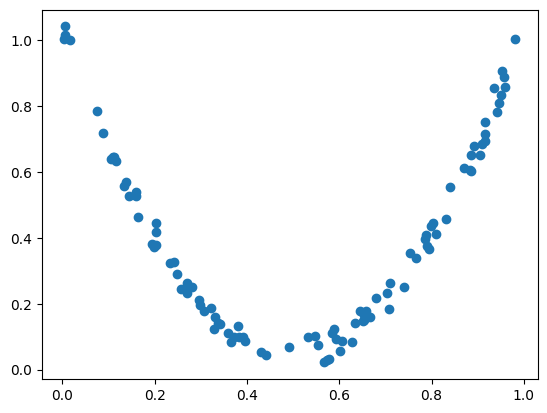

In [ ]:
torch.manual_seed(42)
samples = torch.rand(100)
noise = torch.rand(samples.shape) * 0.1
labels = ((2 * samples - 1) ** 2) + noise

plt.scatter(samples, labels)

## Implementing a Neural Network

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_dim=1, output_dim=1, hidden_dim=10):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        out_hidden = self.linear1(x)
        out_hidden = self.activation(out_hidden)
        out = self.linear2(out_hidden)
        return out

model = MLP()
out = model(x)

torch.Size([50, 1])


Epoch: 0, Loss 1.051221
Epoch: 100, Loss 0.263383
Epoch: 200, Loss 0.245052
Epoch: 300, Loss 0.236747
Epoch: 400, Loss 0.232342
Epoch: 500, Loss 0.228954
Epoch: 600, Loss 0.225488
Epoch: 700, Loss 0.221463
Epoch: 800, Loss 0.216573
Epoch: 900, Loss 0.210654
Epoch: 1000, Loss 0.203589
Epoch: 1100, Loss 0.195254
Epoch: 1200, Loss 0.185550
Epoch: 1300, Loss 0.174565
Epoch: 1400, Loss 0.162622
Epoch: 1500, Loss 0.150175
Epoch: 1600, Loss 0.137450
Epoch: 1700, Loss 0.124568
Epoch: 1800, Loss 0.111725
Epoch: 1900, Loss 0.099210
Epoch: 2000, Loss 0.087248
Epoch: 2100, Loss 0.076096
Epoch: 2200, Loss 0.070700
Epoch: 2300, Loss 0.076248
Epoch: 2400, Loss 0.074311
Epoch: 2500, Loss 0.066957
Epoch: 2600, Loss 0.062770
Epoch: 2700, Loss 0.054266
Epoch: 2800, Loss 0.047211
Epoch: 2900, Loss 0.046713
Epoch: 3000, Loss 0.043094
Epoch: 3100, Loss 0.039236
Epoch: 3200, Loss 0.033687
Epoch: 3300, Loss 0.037575
Epoch: 3400, Loss 0.031758
Epoch: 3500, Loss 0.032871
Epoch: 3600, Loss 0.035658
Epoch: 3700, 

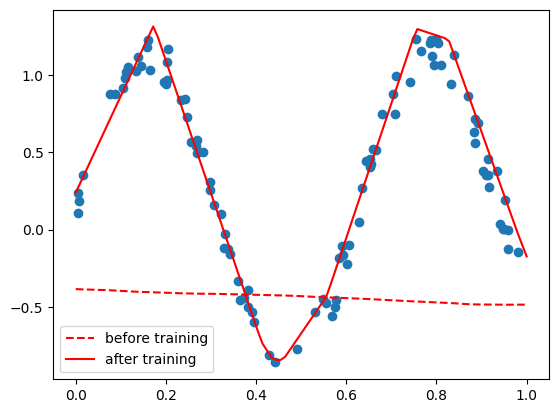

In [ ]:
epochs = 10000
learning_rate = 1e-1

model = MLP(input_dim=1, output_dim=1, hidden_dim=100)
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

plot_points(samples, labels)
plot_module(model, label='before training', linestyle='dashed')
for epoch in range(epochs):
    y_pred = model(samples.float().unsqueeze(1))
    loss = loss_fn(y_pred, labels.float().unsqueeze(1))
    loss.backward()
    optim.step()
    optim.zero_grad()
    if epoch % 100 == 0:
        print("Epoch: %d, Loss %f" % (epoch, float(loss)))
plot_module(model.to('cpu'), label='after training', linestyle='solid')
plt.legend()
plt.show()

## A more complex example

In [ ]:
def training_pipeline(samples,
                      labels,
                      model,
                      loss_fn,
                      optim,
                      epochs=1000,
                      learning_rate=1e-1,
                      print_every=100):
    for epoch in range(epochs):
        y_pred = model(samples.float().unsqueeze(1))
        loss = loss_fn(y_pred, labels.float().unsqueeze(1))
        loss.backward()
        optim.step()
        optim.zero_grad()
        if epoch % print_every == 0:
            print("Epoch: %d, Loss %f" % (epoch, float(loss)))

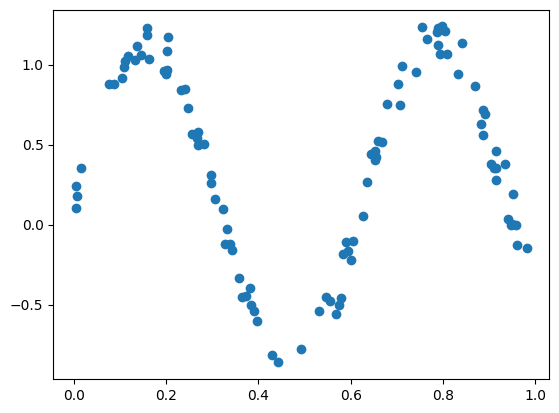

In [ ]:
torch.manual_seed(42)
samples = torch.rand(100)
noise = torch.rand(samples.shape) * 0.3
labels = torch.sin(samples * 10) + noise
plt.scatter(samples, labels)

Epoch: 0, Loss 0.940307
Epoch: 1000, Loss 0.110319
Epoch: 2000, Loss 0.037148
Epoch: 3000, Loss 0.017692
Epoch: 4000, Loss 0.040529
Epoch: 5000, Loss 0.039839
Epoch: 6000, Loss 0.011764
Epoch: 7000, Loss 0.016683
Epoch: 8000, Loss 0.015902
Epoch: 9000, Loss 0.015321


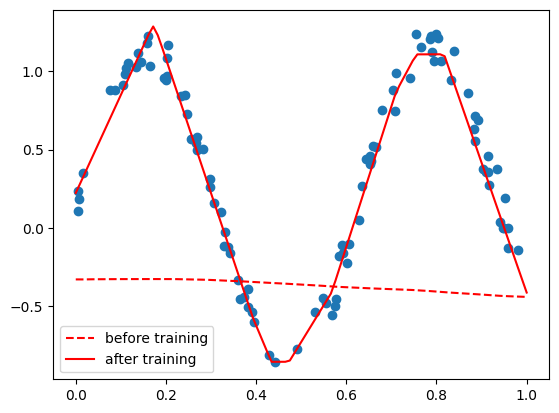

In [ ]:
model = MLP(input_dim=1, output_dim=1, hidden_dim=100)
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

plot_points(samples, labels)
plot_module(model, label='before training', linestyle='dashed')

training_pipeline(samples, labels, model, loss_fn, optim,
                  epochs=10000, learning_rate=1e-1,
                  print_every=1000)

plot_module(model.to('cpu'), label='after training', linestyle='solid')
plt.legend()
plt.show()

In [ ]:
class DeepNeuralNetwork(torch.nn.Module):
    def __init__(self, input_dim=1, output_dim=1,
                 hidden_dim=10):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        out_hidden = self.activation(self.linear1(x))
        out_hidden = self.activation(self.linear2(out_hidden))
        out = self.linear3(out_hidden)
        return out

Epoch: 0, Loss 0.628563
Epoch: 100, Loss 0.324639
Epoch: 200, Loss 0.306280
Epoch: 300, Loss 0.277455
Epoch: 400, Loss 0.276409
Epoch: 500, Loss 0.257967
Epoch: 600, Loss 0.249586
Epoch: 700, Loss 0.295000
Epoch: 800, Loss 0.293767
Epoch: 900, Loss 0.243489
Epoch: 1000, Loss 0.238343
Epoch: 1100, Loss 0.236606
Epoch: 1200, Loss 0.212937
Epoch: 1300, Loss 0.203289
Epoch: 1400, Loss 0.210337
Epoch: 1500, Loss 0.214116
Epoch: 1600, Loss 0.202314
Epoch: 1700, Loss 0.183108
Epoch: 1800, Loss 0.152335
Epoch: 1900, Loss 0.167550
Epoch: 2000, Loss 0.144538
Epoch: 2100, Loss 0.155318
Epoch: 2200, Loss 0.148043
Epoch: 2300, Loss 0.128837
Epoch: 2400, Loss 0.149815
Epoch: 2500, Loss 0.123323
Epoch: 2600, Loss 0.132631
Epoch: 2700, Loss 0.135884
Epoch: 2800, Loss 0.126027
Epoch: 2900, Loss 0.116093
Epoch: 3000, Loss 0.120372
Epoch: 3100, Loss 0.125890
Epoch: 3200, Loss 0.105249
Epoch: 3300, Loss 0.099930
Epoch: 3400, Loss 0.105421
Epoch: 3500, Loss 0.101552
Epoch: 3600, Loss 0.097094
Epoch: 3700, 

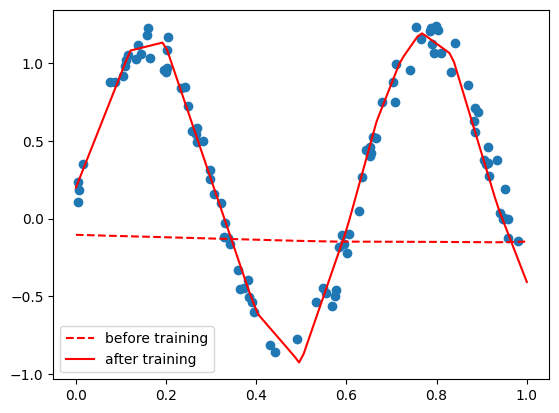

In [ ]:
model = DeepNeuralNetwork(input_dim=1, output_dim=1, hidden_dim=10)
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

plot_points(samples, labels)
plot_module(model, label='before training', linestyle='dashed')

training_pipeline(samples, labels, model, loss_fn, optim,
                  epochs=10000, learning_rate=1e-1)

plot_module(model.to('cpu'), label='after training', linestyle='solid')
plt.legend()
plt.show()

In [ ]:
class DeeperNeuralNetwork(torch.nn.Module):
    def __init__(self, input_dim=1, output_dim=1,
                 hidden_dim=[10, 10, 10]):
        super().__init__()
        dims = [input_dim] + hidden_dim + [output_dim]
        self.layers = torch.nn.ModuleList(
            [
                torch.nn.Linear(dims[i], dims[i + 1])
                for i in range(len(dims) - 1)
            ]
        )
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
        return x

In [ ]:
model = DeeperNeuralNetwork(input_dim=1, output_dim=1,
                            hidden_dim=[10, 10])
plot_points(samples, labels)
plot_module(model, label='before training', linestyle='dashed')

training_pipeline(model, samples, labels,
                  epochs=5000, learning_rate=1e-2)

plot_module(model.to('cpu'), label='after training', linestyle='solid')
plt.legend()
plt.show()

In [ ]:
model = MLP(input_dim=1, output_dim=1, hidden_dim=1000)
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

model = DNN(input_dim=1, output_dim=1, hidden_dim=100)
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

3001
10401


# Classification example (Bonus)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_clf_points(samples, labels):
    classes = np.unique(labels)
    for class_ in classes:
        x1 = samples[labels == class_, 0]
        x2 = samples[labels == class_, 1]
        plt.scatter(x1, x2)

def get_yline_explicit(x, w, b):
    return (-w[0]/w[1]) * x + (-b[0]/w[1])

def plot_clf_line(w, b, samples, eps=0.1, **kwargs):
    xlim = [samples[:, 0].min().item(),
            samples[:, 0].max().item()]
    ylim = [samples[:, 1].min().item(),
            samples[:, 1].max().item()]
    x_range = xlim[1] - xlim[0]
    xlim = [xlim[0] - eps * x_range,
            xlim[1] + eps * x_range]
    yrange = ylim[1] - ylim[0]
    ylim = [ylim[0] - eps * yrange,
            ylim[1] + eps * yrange]


    x_axis = torch.linspace(xlim[0], xlim[1], 100)
    y_axis = get_yline_explicit(x_axis, w, b)
    plt.plot(x_axis.detach().numpy(), y_axis.detach().numpy(), color='r', **kwargs)

    dir = w.squeeze() / w.norm().item()
    dx, dy = dir[0].item(), dir[1].item()

    mask = (y_axis > ylim[0]) & (y_axis < ylim[1])
    xtail = x_axis[mask].mean().item()
    ytail = get_yline_explicit(xtail, w, b)[0].item()

    plt.arrow(xtail, ytail, dx, dy, head_width=0.2, head_length=0.2, color='r')
    plt.xlim(*xlim)
    plt.ylim(*ylim)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def model(x, w, b):
    out = torch.mm(x.float(), w) + b
    return sigmoid(out)

def BCELoss(x, target):
    t = target.unsqueeze(1)
    loss = - t * torch.log(x) - (1 - t) * torch.log(1 - x)
    return loss.mean()

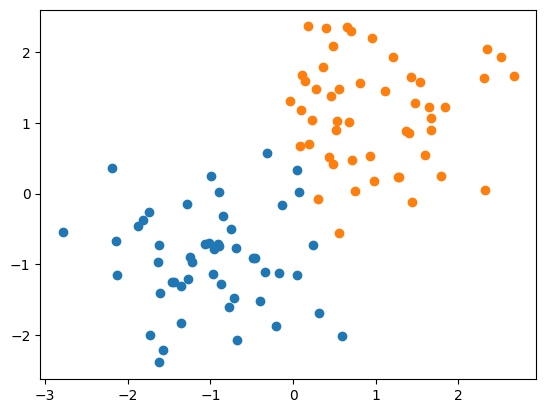

In [ ]:
from sklearn.datasets import make_blobs
centers = np.array([[-1, -1], [1, 1]])
std = .7
samples, labels = make_blobs(n_samples=100,
                             centers=centers,
                             cluster_std=std,
                             n_features=2,
                             random_state=0)
samples, labels = torch.from_numpy(samples), torch.from_numpy(labels)
plot_clf_points(samples, labels)

Initial acc: 0.61
Final acc: 0.98


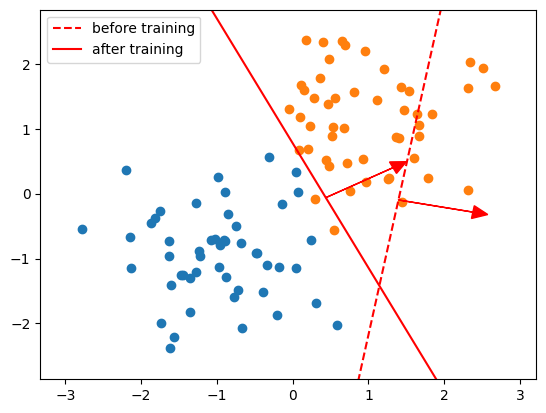

In [ ]:
torch.manual_seed(0)
w = torch.randn(2).unsqueeze(1)
b = torch.randn(1).unsqueeze(1)
w.requires_grad = True
b.requires_grad = True

plot_clf_points(samples, labels)
plot_clf_line(w, b, samples, linestyle='dashed', label='before training')

out = (model(samples, w, b) > 0.5).type(torch.uint8).squeeze()
acc = (out == labels).detach().numpy().mean()
print(f"Initial acc: {acc}")

model(samples, w, b)
lr = 1e-1
epochs = 100

for e in range(epochs):
    output = model(samples, w, b)
    loss = BCELoss(output, labels)
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()

out = (model(samples, w, b) > 0.5).type(torch.uint8).squeeze()
acc = (out == labels).detach().numpy().mean()
print(f"Final acc: {acc}")
plot_clf_line(w, b, samples, linestyle='solid', label='after training')
plt.legend()
